## 1. Import utils

In [1]:
from utils1 import *

## 2. Import the MNIST dataset
- Load the MNIST dataset using the datasets.MNIST function.

In [2]:
trainset = datasets.MNIST(
    "./MNIST_data/", download=True, train=True, transform=transform
)

-Split the training dataset to three datasets for this example.

In [3]:
total_length = len(trainset)
split_size = total_length // 3
torch.manual_seed(42)
part1, part2, part3 = random_split(trainset, [split_size] * 3)

- Set the three different datasets, excluding some digits as shown in the explanation.
    - part1 excludes digits 1, 3, and 7.
    - part2 excludes digits 2, 5, and 8.
    - part3 excludes digits 4, 6, and 9.
This simulates the different datasets that might be available in real world (datasets with missing data, extra data, etc).

In [4]:
part1 = exclude_digits(part1, excluded_digits=[1, 3, 7])
part2 = exclude_digits(part2, excluded_digits=[2, 5, 8])
part3 = exclude_digits(part3, excluded_digits=[4, 6, 9])

- Plot the three datasets.

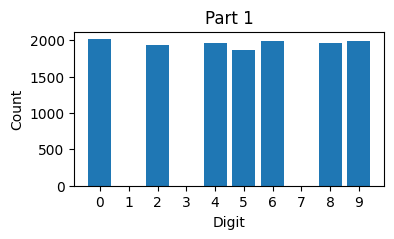

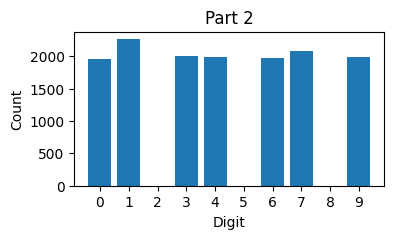

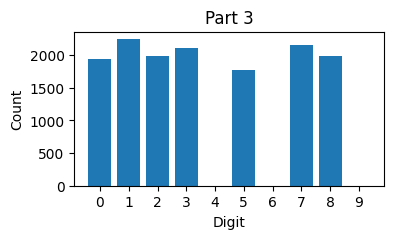

In [5]:
plot_distribution(part1, "Part 1")
plot_distribution(part2, "Part 2")
plot_distribution(part3, "Part 3")

## 3. Train and test the models
- Define three and run the models.

Three instances of the SimpleModel class (model1, model2, model3) are created for training. Find the SimpleModel class in the utils1.py file.

In [6]:
model1 = SimpleModel()
train_model(model1, part1)

model2 = SimpleModel()
train_model(model2, part2)

model3 = SimpleModel()
train_model(model3, part3)

Epoch 1: Loss = 0.5065382014873416
Epoch 2: Loss = 0.24500494176565216
Epoch 3: Loss = 0.19132229859052702
Epoch 4: Loss = 0.15808402188988618
Epoch 5: Loss = 0.1317168086160754
Epoch 6: Loss = 0.11005786858758954
Epoch 7: Loss = 0.09560647581725619
Epoch 8: Loss = 0.08431708378673985
Epoch 9: Loss = 0.0709400400649323
Epoch 10: Loss = 0.0613757313077533
Training complete
Epoch 1: Loss = 0.3983497708104551
Epoch 2: Loss = 0.18235595449472644
Epoch 3: Loss = 0.1642766196829533
Epoch 4: Loss = 0.1346918883417467
Epoch 5: Loss = 0.12096210683064003
Epoch 6: Loss = 0.09922834034244131
Epoch 7: Loss = 0.09154477070634519
Epoch 8: Loss = 0.08096778528228502
Epoch 9: Loss = 0.07251403305313683
Epoch 10: Loss = 0.06491988018803697
Training complete
Epoch 1: Loss = 0.5017053608757418
Epoch 2: Loss = 0.2649856668871802
Epoch 3: Loss = 0.20764534314674837
Epoch 4: Loss = 0.1648575153101135
Epoch 5: Loss = 0.13950551686355392
Epoch 6: Loss = 0.12051728502889206
Epoch 7: Loss = 0.10085867242971519


## 4. Evaluate the models
- Load the test dataset.

In [7]:
testset = datasets.MNIST(
    "./MNIST_data/", download=True, train=False, transform=transform
)

- Dataset preparation:
    - testset_137 includes digits 1, 3, and 7.
    - testset_258 includes digits 2, 5, and 8.
    - testset_469 includes digits 4, 6, and 9.

In [8]:
testset_137 = include_digits(testset, included_digits=[1, 3, 7])
testset_258 = include_digits(testset, included_digits=[2, 5, 8])
testset_469 = include_digits(testset, included_digits=[4, 6, 9])

- Evaluate the models with the test datasets.

The evaluate_model function is called to evaluate each model defined above (model1, model2, model3) on both, the entire test dataset and specific subsets of the test dataset.

In [9]:
_, accuracy1 = evaluate_model(model1, testset)
_, accuracy1_on_137 = evaluate_model(model1, testset_137)
print(
    f"Model 1-> Test Accuracy on all digits: {accuracy1:.4f}, "
    f"Test Accuracy on [1,3,7]: {accuracy1_on_137:.4f}"
)

_, accuracy2 = evaluate_model(model2, testset)
_, accuracy2_on_258 = evaluate_model(model2, testset_258)
print(
    f"Model 2-> Test Accuracy on all digits: {accuracy2:.4f}, "
    f"Test Accuracy on [2,5,8]: {accuracy2_on_258:.4f}"
)

_, accuracy3 = evaluate_model(model3, testset)
_, accuracy3_on_469 = evaluate_model(model3, testset_469)
print(
    f"Model 3-> Test Accuracy on all digits: {accuracy3:.4f}, "
    f"Test Accuracy on [4,6,9]: {accuracy3_on_469:.4f}"
)

Model 1-> Test Accuracy on all digits: 0.6570, Test Accuracy on [1,3,7]: 0.0000
Model 2-> Test Accuracy on all digits: 0.6872, Test Accuracy on [2,5,8]: 0.0000
Model 3-> Test Accuracy on all digits: 0.6848, Test Accuracy on [4,6,9]: 0.0000


- Analyze the results looking at the 'confusion matrix' for the three models just trained using the compute_confusion_matrix. You can find this function in the utils1.py file.

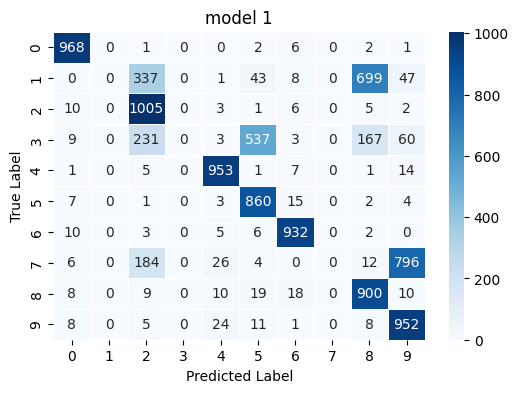

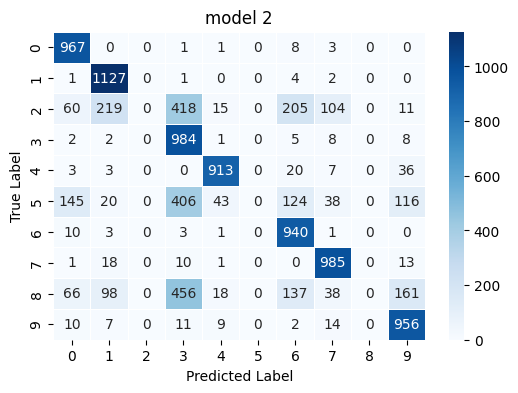

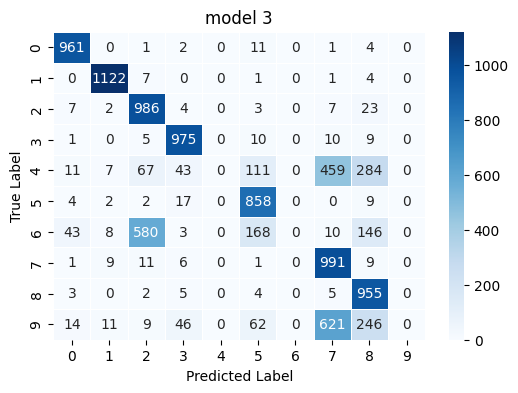

In [10]:
confusion_matrix_model1_all = compute_confusion_matrix(model1, testset)
confusion_matrix_model2_all = compute_confusion_matrix(model2, testset)
confusion_matrix_model3_all = compute_confusion_matrix(model3, testset)

plot_confusion_matrix(confusion_matrix_model1_all, "model 1")
plot_confusion_matrix(confusion_matrix_model2_all, "model 2")
plot_confusion_matrix(confusion_matrix_model3_all, "model 3")